# Airbnb Superhosts analysis

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Loading and cleaning datasets

In [39]:
# Loading datasets
seattle_listings = pd.read_csv("seattle/listings.csv")
boston_listings = pd.read_csv("boston/listings.csv")

In [40]:
# Selecting superhosts from both datasets
seattle_superhosts = seattle_listings[seattle_listings["host_is_superhost"] == "t"]
boston_superhosts = boston_listings[boston_listings["host_is_superhost"] == "t"]

In [25]:
# Dropping duplicates by the host_id
seattle_superhosts = seattle_superhosts.drop_duplicates(subset=["host_id"])
boston_superhosts = boston_superhosts.drop_duplicates(subset=["host_id"])

In [42]:
# Checking extra columns in boston dataset to drop them
for col in boston_superhosts.columns:
    if col not in seattle_superhosts.columns:
        print(col)

access
interaction
house_rules


In [43]:
# Dropping extra columns
boston_superhosts = boston_superhosts.drop(
    columns=["access", "interaction", "house_rules"]
)

In [44]:
# Appending superhosts from both cities in a single dataframe
complete = seattle_superhosts.append(boston_superhosts)

## Functions used in this notebook

In [67]:
def bar_plot(data, x_data, y_data, x_label, y_label, save_as, color_palette = "bright", orientation = "h"):
    """ 
    Summary line
    
    Makes a bar plot from the data provided as an input
    
    Parameters:
    data(Pandas Dataframe): Dataframe from which the data will be extracted for the bar plot
    x_data(Pandas Series): data column to be plotted on the x-axis
    y_data(Pandas Series): data column to be plotted on the y-axis
    x_label(string): name for the x-axis on the plot
    y_label(string): name for the y-axis on the plot
    save_as(string): name for the plot image to be downloaded
    color_palette(string) = seaborn color palette for the bar plot
    orientation(string) = orientation for the plot's axis
    
    Returns:
    None
    
    """
    bar_plot = sns.barplot(
    x = x_data,
    y = y_data,
    data = data,
    orient = orientation,
    palette = color_palette)
    bar_plot.set(xlabel = x_label, ylabel = y_label)
    bar_plot.figure.tight_layout()
    bar_plot.figure.savefig(save_as)

# How correlated is the Superhost status with the number of properties listed on Airbnb?

In [29]:
grouped_by_property_num = complete.groupby(
    'host_total_listings_count').count().reset_index()

In [30]:
grouped_by_property_num

,host_total_listings_count,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,1.0,557,557,557,557,557,543,517,557,557,...,552,557,0,396,557,557,557,557,557,552
1,2.0,148,148,148,148,148,142,138,148,148,...,142,148,0,88,148,148,148,148,148,142
2,3.0,41,41,41,41,41,39,35,41,41,...,35,41,0,27,41,41,41,41,41,35
3,4.0,18,18,18,18,18,18,17,18,18,...,18,18,0,14,18,18,18,18,18,18
4,5.0,10,10,10,10,10,9,10,10,10,...,9,10,0,7,10,10,10,10,10,9
5,6.0,6,6,6,6,6,6,6,6,6,...,6,6,0,1,6,6,6,6,6,6
6,7.0,4,4,4,4,4,4,4,4,4,...,4,4,0,1,4,4,4,4,4,4
7,8.0,2,2,2,2,2,2,0,2,2,...,2,2,0,0,2,2,2,2,2,2
8,10.0,2,2,2,2,2,2,2,2,2,...,2,2,0,1,2,2,2,2,2,2
9,12.0,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1


In [31]:
grouped_by_property_num = grouped_by_property_num.rename(columns={
    'host_total_listings_count': "# listings owned by host",
    'id': '# superhosts'
})

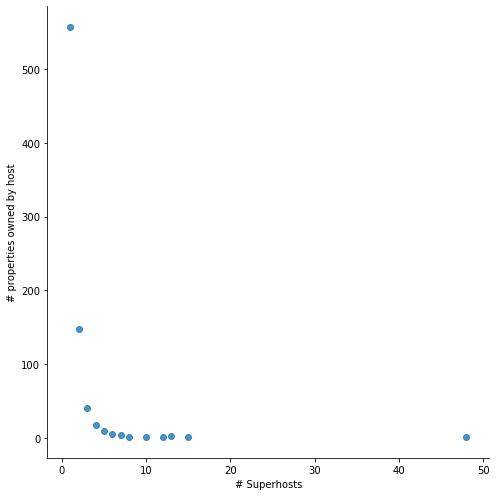

In [45]:
scatter_plot = sns.lmplot(
    x='# listings owned by host',
    y='# superhosts',
    data=grouped_by_property_num,
    fit_reg=False,
    size=7)
scatter_plot.set(xlabel='# Superhosts', ylabel='# properties owned by host')
scatter_plot.savefig("propertiesOwned.png")

# What are the most common property types managed by Superhosts?

In [33]:
grouped_by_property_type = complete.groupby('property_type').count(
).reset_index().sort_values(by="id", ascending=False)

In [203]:
grouped_by_property_type

,property_type,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Apartment,366,366,366,366,366,357,328,366,366,...,358,366,0,207,366,366,366,366,366,358
7,House,335,335,335,335,335,323,318,335,335,...,327,335,0,277,335,335,335,335,335,327
6,Condominium,25,25,25,25,25,25,22,25,25,...,24,25,0,7,25,25,25,25,25,24
10,Townhouse,21,21,21,21,21,21,20,21,21,...,20,21,0,13,21,21,21,21,21,20
8,Loft,15,15,15,15,15,14,13,15,15,...,15,15,0,9,15,15,15,15,15,15
4,Cabin,12,12,12,12,12,12,11,12,12,...,12,12,0,12,12,12,12,12,12,12
1,Bed & Breakfast,11,11,11,11,11,11,11,11,11,...,11,11,0,5,11,11,11,11,11,11
5,Camper/RV,2,2,2,2,2,1,2,2,2,...,2,2,0,2,2,2,2,2,2,2
9,Other,2,2,2,2,2,2,2,2,2,...,2,2,0,2,2,2,2,2,2,2
2,Boat,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1


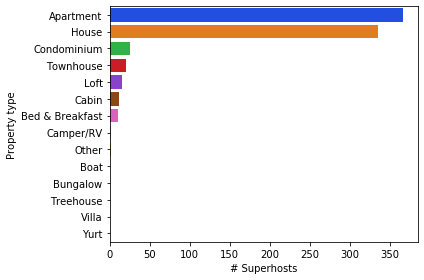

In [59]:
bar_plot(data = grouped_by_property_type, x_data = "id", 
         y_data = "property_type", 
         x_label = "# Superhosts", 
         y_label = "Property type", 
         save_as = "propertyTypes.png")

In [35]:
grouped_by_room_type = complete.groupby('room_type').count(
).reset_index().sort_values(by="id", ascending=False)

In [68]:
grouped_by_room_type

,room_type,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Entire home/apt,492,492,492,492,492,476,459,492,492,...,480,492,0,353,492,492,492,492,492,480
1,Private room,288,288,288,288,288,281,262,288,288,...,284,288,0,175,288,288,288,288,288,284
2,Shared room,14,14,14,14,14,14,11,14,14,...,12,14,0,9,14,14,14,14,14,12


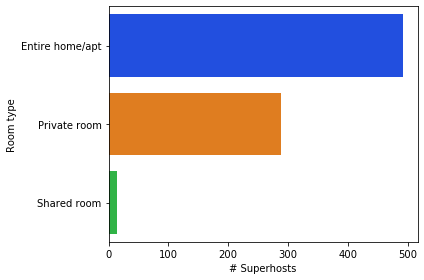

In [60]:
bar_plot(data = grouped_by_room_type, x_data = "id", 
         y_data = "room_type", 
         x_label = "# Superhosts", 
         y_label = "Room type", 
         save_as = "roomTypes.png")

## How long does a Superhost take to answer guests/leads messages through the platform?

In [37]:
grouped_by_response_time = complete.groupby('host_response_time').count(
).reset_index().sort_values(by="id", ascending=False)

In [65]:
grouped_by_response_time

,host_response_time,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3,within an hour,429,429,429,429,429,417,403,429,429,...,422,429,0,303,429,429,429,429,429,422
2,within a few hours,254,254,254,254,254,245,228,254,254,...,249,254,0,154,254,254,254,254,254,249
1,within a day,74,74,74,74,74,72,65,74,74,...,69,74,0,48,74,74,74,74,74,69
0,a few days or more,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1


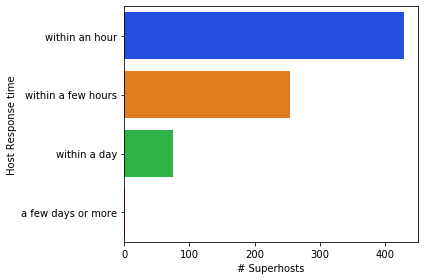

In [66]:
bar_plot(data = grouped_by_response_time, x_data = "id", 
         y_data = "host_response_time", 
         x_label = "# Superhosts", 
         y_label = "Host Response time", 
         save_as = "responseTimes.png")